# Comparison with APL library on OpenML benchmark datasets

In this notebook we will compare our library with official SAP HANA Automated Predictive Library (details here: https://help.sap.com/viewer/cb31bd99d09747089754a0ba75067ed2/2.5.0.0/en-US). In most cases, our library beats it in accuracy. However, there is always room for improvement. 

In [9]:
from hana_automl.utils.perfomance import Benchmark
from hana_automl.utils.connection import connection_context
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
b = Benchmark(connection_context)
GRADIENT = False
apl_acc = []
hana_acc = []
datasets = ['kr-vs-kp.csv', 'australian.csv', 'phoneme.csv', 'adult.csv', 'blood.csv', 'higgs.csv', 'sylvine.csv', 'credit.csv', 'kc1.csv']
df = pd.DataFrame()
!python3 hana_automl/utils/cleanup.py

def plot_results(task: str, boosting: bool):
    df['APL'] = apl_acc
    df['HANA AutoML'] = hana_acc
    df['Dataset'] = datasets
    x = np.arange(len(datasets))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, apl_acc, width, label='APL')
    rects2 = ax.bar(x + width/2, hana_acc, width, label='HANA AutoML')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    if boosting:
        ax.set_title(f'{task} (APL with Gradient Boosting)')
    else:
        ax.set_title(f'{task} (APL without Gradient Boosting)')
    
    ax.set_xticks(x)
    ax.set_xticklabels(datasets)
    ax.legend()

    ax.bar_label(rects1)
    ax.bar_label(rects2)

    plt.gcf().set_size_inches(10,5)
    plt.show()


Traceback (most recent call last):
  File "/Users/danonchik/dev/SAP-HANA-AutoML/hana_automl/utils/cleanup.py", line 3, in <module>
    from hana_automl.storage import table_exists
ModuleNotFoundError: No module named 'hana_automl'


## Just APL, without Gradient Boosting enabled:
Don't know what is Gradient Boosting? Check here: https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/ . We are using special benchmark datasets from OpenML to compare model accuracy.

## Classification

In [8]:
b.run('./data/benchmark/cls/kr-vs-kp.csv', task='cls', label='class', categorical=['class'], grad_boost=GRADIENT)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)
!python3 hana_automl/utils/cleanup.py

b.run('./data/benchmark/cls/australian.csv', task='cls', 
      label='A15', 
      categorical=['A15', 'A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12'],
      grad_boost=GRADIENT)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)
!python3 hana_automl/utils/cleanup.py


b.run('./data/benchmark/cls/phoneme.csv', task='cls', label='Class', categorical=['Class'], grad_boost=GRADIENT)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)
!python3 hana_automl/utils/cleanup.py

b.run('./data/benchmark/cls/adult.csv', task='cls', label='class', categorical=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'class'], grad_boost=GRADIENT)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)
!python3 hana_automl/utils/cleanup.py

b.run('./data/benchmark/cls/blood.csv', task='cls', label='Class', categorical=['Class'], grad_boost=GRADIENT)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)
!python3 hana_automl/utils/cleanup.py

b.run('./data/benchmark/cls/higgs.csv', task='cls', label='class', categorical=['class'], grad_boost=GRADIENT)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)
!python3 hana_automl/utils/cleanup.py

b.run('./data/benchmark/cls/sylvine.csv', task='cls', label='class', categorical=['class'], grad_boost=GRADIENT)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)
!python3 hana_automl/utils/cleanup.py

b.run('./data/benchmark/cls/credit.csv', task='cls', label='class', categorical=['class', 'checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker'], grad_boost=GRADIENT)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)
!python3 hana_automl/utils/cleanup.py

b.run('./data/benchmark/cls/kc1.csv', task='cls', label='defects', categorical=['defects'], grad_boost=GRADIENT)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)
!python3 hana_automl/utils/cleanup.py

100%|██████████| 1/1 [00:00<00:00,  2.09it/s]


Finished in 6 seconds
APL accuracy:  0.9395203336809176
Recreating table BENCHMARK_AUTOML with data from dataframe


100%|██████████| 1/1 [00:00<00:00,  2.47it/s]


Done


[I 2021-05-04 01:20:13,404] A new study created in memory with name: no-name-4666e428-e0a7-4070-ac6c-f69be5590eba


Task: cls


(256, 'sql processing error: "DEVELOPER"."(DO statement)": line 9 col 1 (at pos 1309): search table error: _SYS_AFL.AFLPAL:HGBTPREDICT_ANY: [102] (range 1) TypeMismatch exception: Column \'age\' does not exist')
Traceback (most recent call last):
  File "/Users/danonchik/dev/SAP-HANA-AutoML/venv/lib/python3.9/site-packages/hana_ml/algorithms/pal/trees.py", line 3769, in _predict
    call_pal_auto(conn,
  File "/Users/danonchik/dev/SAP-HANA-AutoML/venv/lib/python3.9/site-packages/hana_ml/algorithms/pal/pal_base.py", line 338, in call_pal_auto
    if try_exec(cur, sql):
  File "/Users/danonchik/dev/SAP-HANA-AutoML/venv/lib/python3.9/site-packages/hana_ml/algorithms/pal/pal_base.py", line 309, in try_exec
    execute_logged(cur, sql, conn.sql_tracer) # SQLTRACE added sql_tracer
  File "/Users/danonchik/dev/SAP-HANA-AutoML/venv/lib/python3.9/site-packages/hana_ml/ml_base.py", line 338, in execute_logged
    cursor.execute(statement)
hdbcli.dbapi.Error: (256, 'sql processing error: "DEVELOP

Error: (256, 'sql processing error: "DEVELOPER"."(DO statement)": line 9 col 1 (at pos 1309): search table error: _SYS_AFL.AFLPAL:HGBTPREDICT_ANY: [102] (range 1) TypeMismatch exception: Column \'age\' does not exist')

In [ ]:
plot_results(task='Classification', boosting=GRADIENT)

## Regression

In [14]:
datasets = ['elevators.csv', 'wine_quality.csv', 'baseball.csv']
hana_acc = []
apl_acc = []

In [15]:
# https://www.openml.org/d/216
b.run('./data/benchmark/reg/elevators.csv', task='reg', label='Goal', grad_boost=False)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)

100%|██████████| 1/1 [00:00<00:00,  1.22it/s]


Finished in 8 seconds
APL accuracy:  0.8421264187068715
Recreating table BENCHMARK_AUTOML with data from dataframe


100%|██████████| 1/1 [00:02<00:00,  2.14s/it]


Done
Task: reg
Finished in 260 seconds
hana_automl accuracy: 0.7078043165454868


In [16]:
# https://www.openml.org/d/287
b.run('./data/benchmark/reg/wine_quality.csv', task='reg', label='quality', grad_boost=False)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)

100%|██████████| 1/1 [00:00<00:00,  4.36it/s]


Finished in 6 seconds
APL accuracy:  0.2129412541058407
Recreating table BENCHMARK_AUTOML with data from dataframe


100%|██████████| 1/1 [00:00<00:00,  2.68it/s]


Done
Task: reg
Finished in 309 seconds
hana_automl accuracy: 0.35223293773110864


In [17]:
# https://www.openml.org/d/41021
b.run('./data/benchmark/reg/baseball.csv', task='reg', label='RS', grad_boost=False)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)

100%|██████████| 1/1 [00:00<00:00,  6.04it/s]


Finished in 5 seconds
APL accuracy:  0.9417645462157332
Recreating table BENCHMARK_AUTOML with data from dataframe


100%|██████████| 1/1 [00:00<00:00,  5.64it/s]


Done
Task: reg
Finished in 259 seconds
hana_automl accuracy: 0.9276013428577136


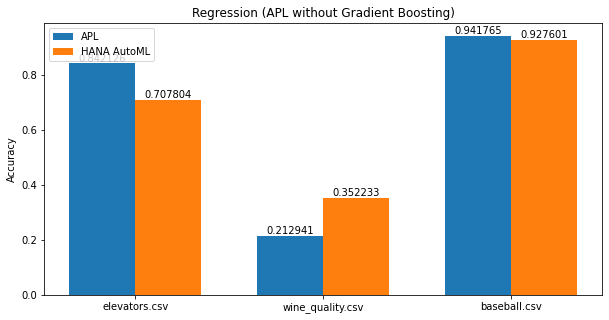

In [18]:
plot_results(task='Regression', boosting=False)

## Gradient boosting enabled

## Classification

In [19]:
datasets = ['kr-vs-kp.csv', 'australian.csv', 'phoneme.csv']
hana_acc = []
apl_acc = []

In [ ]:
# https://www.openml.org/d/3
b.run('./data/benchmark/cls/kr-vs-kp.csv', task='cls', label='class', categorical=['class'], grad_boost=True)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)

In [ ]:
# https://www.openml.org/d/40981
b.run('./data/benchmark/cls/australian.csv', task='cls', 
      label='A15', 
      categorical=['A15', 'A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12'],
      grad_boost=True)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)

In [ ]:
# https://www.openml.org/d/1489
b.run('./data/benchmark/cls/phoneme.csv', task='cls', label='Class', categorical=['Class'], grad_boost=True)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)

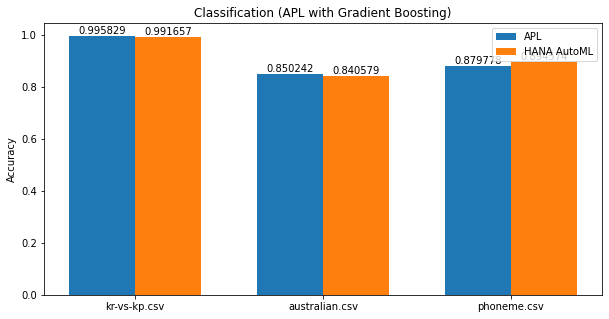

In [23]:
plot_results(task='Classification', boosting=True)

## Regression

In [7]:
datasets = ['elevators.csv', 'wine_quality.csv', 'baseball.csv']
hana_acc = []
apl_acc = []

In [8]:
# https://www.openml.org/d/216
b.run('./data/benchmark/reg/elevators.csv', task='reg', label='Goal', grad_boost=True)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)

100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


Finished in 9 seconds
APL accuracy:  0.9052400971457588
Recreating table BENCHMARK_AUTOML with data from dataframe


100%|██████████| 1/1 [00:01<00:00,  1.42s/it]


Done
Task: reg
Finished in 257 seconds
hana_automl accuracy: 0.8187620834659429


In [9]:
# https://www.openml.org/d/287
b.run('./data/benchmark/reg/wine_quality.csv', task='reg', label='quality', grad_boost=True)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)

100%|██████████| 1/1 [00:00<00:00,  1.94it/s]


Finished in 6 seconds
APL accuracy:  0.32326066404388615
Recreating table BENCHMARK_AUTOML with data from dataframe


100%|██████████| 1/1 [00:00<00:00,  2.21it/s]


Done
Task: reg
Finished in 251 seconds
hana_automl accuracy: 0.3355386669058269


In [10]:
# https://www.openml.org/d/41021
b.run('./data/benchmark/reg/baseball.csv', task='reg', label='RS', grad_boost=True)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)

100%|██████████| 1/1 [00:00<00:00,  6.54it/s]


Finished in 5 seconds
APL accuracy:  0.9396105251438497
Recreating table BENCHMARK_AUTOML with data from dataframe


100%|██████████| 1/1 [00:00<00:00,  4.63it/s]


Done
Task: reg
Finished in 288 seconds
hana_automl accuracy: 0.9377257874515008


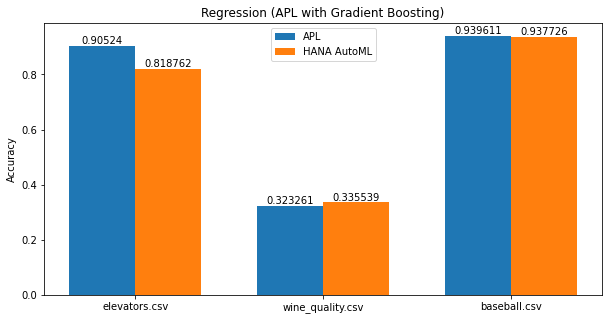

In [11]:
plot_results(task='Regression', boosting=True)